In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\retail_sales_dataset.csv")

# Display basic info and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')

In [4]:
# 1. Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# 2. Revenue by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

# 3. Gender-Based Category Preference
gender_category = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# 4. Spending by Age Group
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Create Visualizations
sns.set(style="whitegrid")

C:\Users\USER\AppData\Local\Temp\ipykernel_21560\3848423323.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()


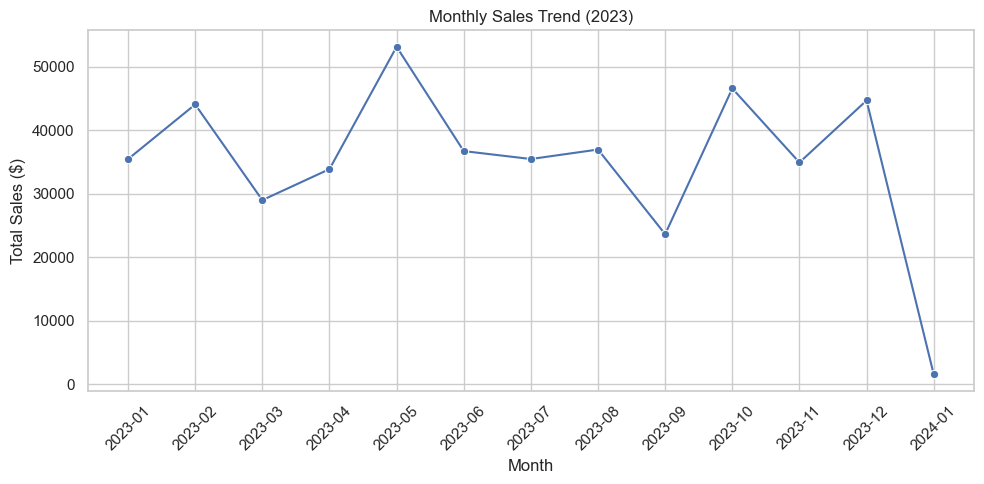

In [5]:
# Plot 1: Monthly Sales Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o', color='b')
plt.title('Monthly Sales Trend (2023)')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')

C:\Users\USER\AppData\Local\Temp\ipykernel_21560\78892165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')


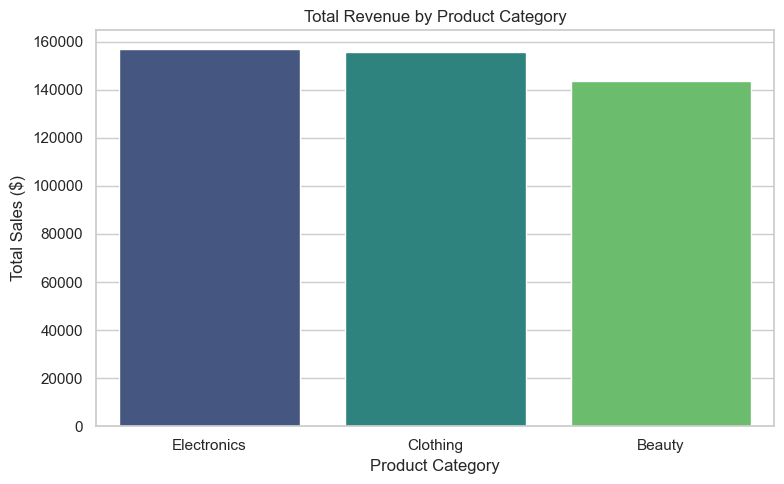

In [6]:
# Plot 2: Revenue by Product Category
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('revenue_by_category.png')

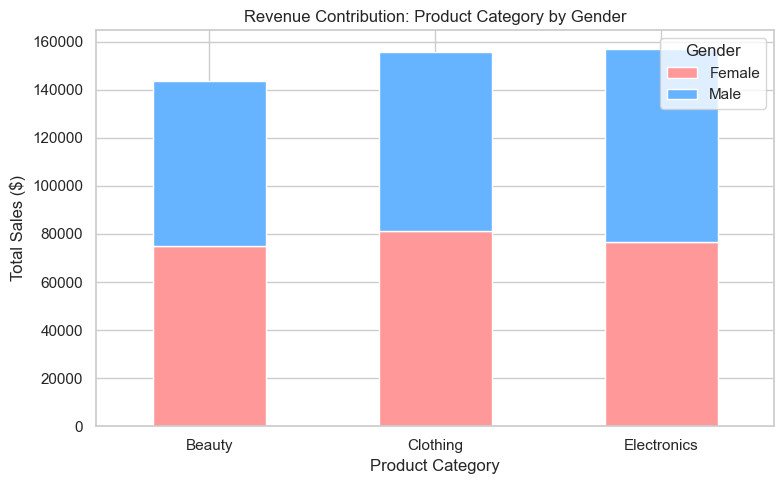

In [7]:
# Plot 3: Gender-Based Category Preference
plt.figure(figsize=(8, 5))
gender_category.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], ax=plt.gca())
plt.title('Revenue Contribution: Product Category by Gender')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_category_revenue.axes.png')

C:\Users\USER\AppData\Local\Temp\ipykernel_21560\3597008804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_sales, x='Age Group', y='Total Amount', palette='magma')


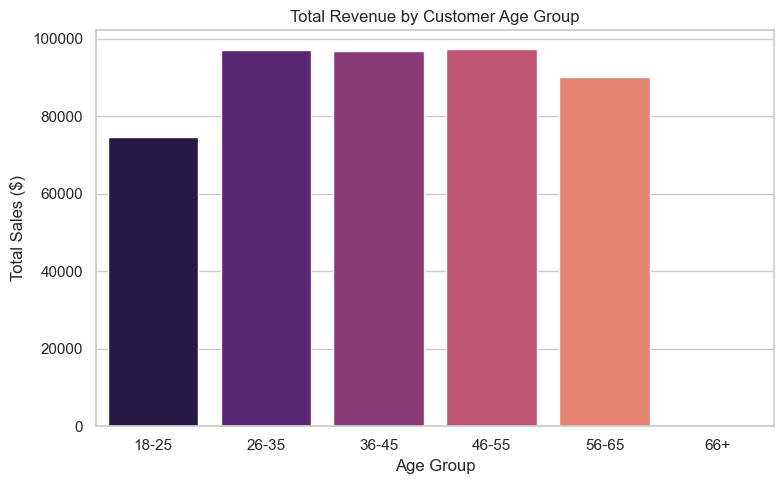

In [8]:
# Plot 4: Revenue by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(data=age_sales, x='Age Group', y='Total Amount', palette='magma')
plt.title('Total Revenue by Customer Age Group')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('revenue_by_age_group.png')